新闻分类--多分类问题

加载路透社数据集

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

print(len(train_data))

print(len(test_data))

8982
2246


In [6]:
print(type(train_data))

print(train_data.shape)

print(train_data[10])

<class 'numpy.ndarray'>
(8982,)
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


将索引解码为新闻文本

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join(reverse_word_index.get(i - 3, '?') for i in train_data[0])

print(train_labels[10])

3


准备数据

In [0]:
import numpy as np

def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

将数据向量化

In [0]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

one-hot编码

In [0]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [0]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

用keras内置方法实现标签one-hot分类

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

构建网络

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

编译模型

In [0]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

验证集

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


训练模型

In [27]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 266us/step - loss: 2.5242 - acc: 0.4960 - val_loss: 1.7204 - val_acc: 0.6130
Epoch 2/20
7982/7982 [==============================] - 1s 172us/step - loss: 1.4457 - acc: 0.6885 - val_loss: 1.3484 - val_acc: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.0979 - acc: 0.7637 - val_loss: 1.1747 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 163us/step - loss: 0.8722 - acc: 0.8160 - val_loss: 1.0784 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 162us/step - loss: 0.7059 - acc: 0.8485 - val_loss: 0.9871 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 157us/step - loss: 0.5686 - acc: 0.8797 - val_loss: 0.9434 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 151us/step - loss: 0.4604 - acc: 0.9044 - val_loss: 0.9099 - val_acc: 0.8000


绘制训练损失和验证损失

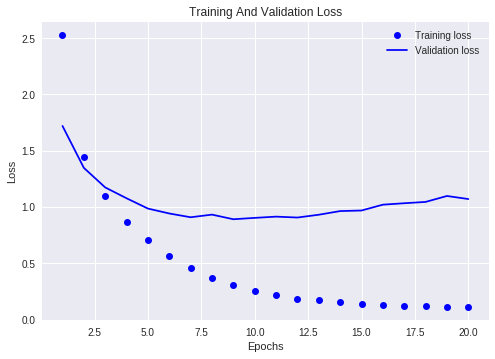

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training And Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

绘制训练精度和验证精度

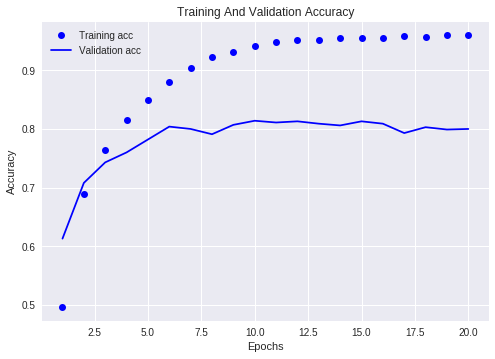

In [36]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training And Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

重新训练一个模型

In [37]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 196us/step - loss: 2.5389 - acc: 0.5227 - val_loss: 1.6739 - val_acc: 0.6570
Epoch 2/20
7982/7982 [==============================] - 1s 162us/step - loss: 1.3724 - acc: 0.7121 - val_loss: 1.2766 - val_acc: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 144us/step - loss: 1.0149 - acc: 0.7779 - val_loss: 1.1320 - val_acc: 0.7530
Epoch 4/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.7985 - acc: 0.8246 - val_loss: 1.0543 - val_acc: 0.7590
Epoch 5/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.6399 - acc: 0.8623 - val_loss: 0.9759 - val_acc: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 142us/step - loss: 0.5126 - acc: 0.8920 - val_loss: 0.9107 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 143us/step - loss: 0.4122 - acc: 0.9149 - val_loss: 0.8921 - val_acc: 0.8220


本例中完全随机的精度

In [38]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.1829919857524488

在新数据上生成预测结果

In [39]:
predictions = model.predict(x_test)

print(predictions[0].shape)

print(np.sum(predictions[0]))

print(np.argmax(predictions[0]))

(46,)
1.0
3
